<a href="https://colab.research.google.com/github/yaman9675/Bank-Marketing-Effectiveness-Prediction/blob/main/Yaman_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [557]:
# Importing the libraries
import numpy as np
import pandas as pd
#import klib
from numpy import math
from matplotlib import rcParams

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [558]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [559]:
 #file path reading or csv upload to coolab from drive
file_path='/content/drive/MyDrive/Colab Notebooks/Capstone Project/Bank Marketing Effectiveness Prediction/bank-full.csv'    
bank_df=pd.read_csv(file_path)

In [560]:
bank_df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [561]:
 #file path reading or csv upload to coolab from drive
file_path='/content/drive/MyDrive/Colab Notebooks/Capstone Project/Bank Marketing Effectiveness Prediction/bank-full.csv'    
bank_df=pd.read_csv(file_path, sep = ";")

# **Data Summary**

In [562]:
#number of rows, number of columns
bank_df.shape

(45211, 17)

In [563]:
#the total number of elements in the array. 
bank_df.size

768587

In [564]:
#Name of columns we have in our data base 
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [565]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [566]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [567]:
#total count null values
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# **Descriptive Analysis**

In [568]:
#value through we are goin to deal
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [569]:
#value through we are goin to deal
bank_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [570]:
# data information we have
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#<b>EDA

1) Age

In [571]:
age = bank_df['age'].value_counts().reset_index()
age = age.rename(columns = {'index':'age', 'age':'age_count'})
age['count%'] = age['age_count']*100/len(bank_df)
age.head()

,age,age_count,count%
0,32,2085,4.611710
1,31,1996,4.414855
2,33,1972,4.361770
3,34,1930,4.268873
4,35,1894,4.189246


In [572]:
age.tail()

,age,age_count,count%
72,93,2,0.004424
73,90,2,0.004424
74,95,2,0.004424
75,88,2,0.004424
76,94,1,0.002212


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


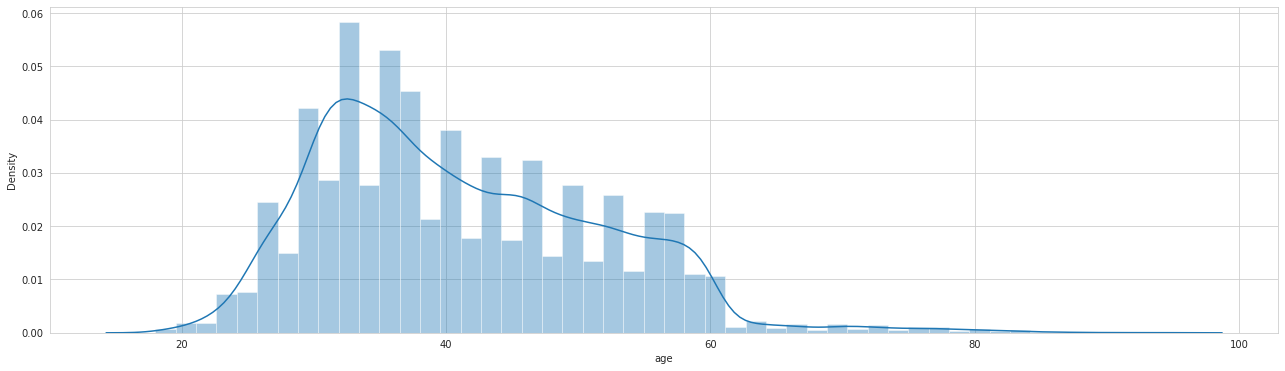

In [573]:
plt.figure(figsize=(22,6))
sns.distplot(bank_df['age'])

In [574]:
age_mean = bank_df['age'].mean()
age_median = bank_df['age'].median()
age_mode = bank_df['age'].mode()
age_max = age['age'].max()
age_min = age['age'].min()

print(f'Mean of the age is: {age_mean}')
print(f'Median of the age is: {age_median}')
print(f'Maximum age is: {age_max}')
print(f'Minimum age is: {age_min}')
print(f'Mode of the age is: {age_mode}')

Mean of the age is: 40.93621021432837
Median of the age is: 39.0
Maximum age is: 95
Minimum age is: 18
Mode of the age is: 0    32
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


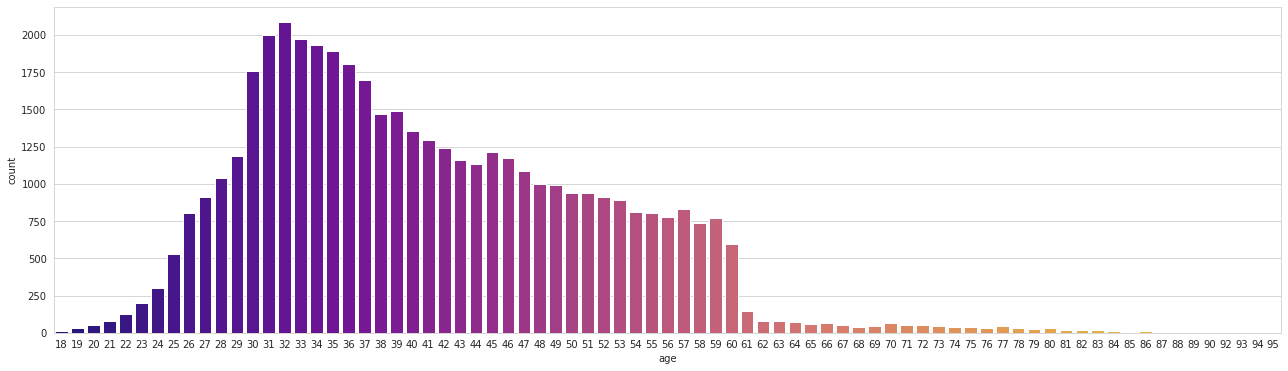

In [575]:
plt.figure(figsize=(22,6))
sns.countplot(bank_df['age'], palette="plasma")

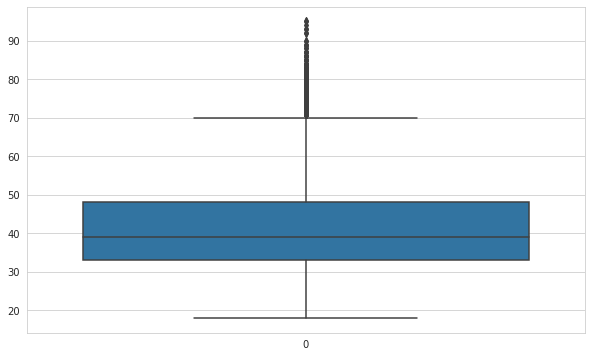

In [576]:
plt.figure(figsize=(10,6))
sns.boxplot(data=bank_df['age'])

In [577]:
age_q1 = bank_df['age'].quantile(0.25)
age_q3 = bank_df['age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_ll  = age_q1 - 1.5*age_iqr
age_ul  = age_q3 + 1.5*age_iqr
# print(age_q1)
# print(age_q3)
# print(age_iqr)
print(f'Lower limit of age :{age_ll}')
print(f'Upper limit of age :{age_ul}')

Lower limit of age :10.5
Upper limit of age :70.5


In [578]:
#Lets explore the age variables more

#let see what percentage of 18 years old customers accept term deposit
age_18 = bank_df[bank_df['age']==18]
age_18_y = 100 * (len(age_18[age_18['y'] == 'yes'])) / (len(age_18))
print(f'The % of 18 year old customer accept term deposit is: {round(age_18_y, 2)}')

#let see what percentage of 32 years old customers accept term deposit
age_32 = bank_df[bank_df['age']==32]
age_32_y = 100 * (len(age_32[age_32['y'] == 'yes'])) / (len(age_32))
print(f'The % of 32 year old customer accept term deposit is: {round(age_32_y, 2)}')

#print('\n')

#let see what percentage of 18 to 30 years old customers accept term deposit
age_18_30 = bank_df[(bank_df['age']>18) & (bank_df['age']<30)] 
age_18_30_y = 100 * (len(age_18_30[age_18_30['y'] == 'yes'])) / (len(age_18_30))
print(f'The % of 18 to 30 year old customer accept term deposit is: {round(age_18_30_y, 2)}')

#lets see the % of term deposit acceptance from 30 to 100 year old customer each 10 year slot 
r = [] #empty list to store the % result
for i in range(30,100,10):
  age = bank_df[(bank_df['age']>=i) & (bank_df['age']<i+10)]
  age_y = 100 * (len(age[age['y'] == 'yes'])) / (len(age))
  r.append(age_y)
  
#Print age range and their % of term deposit acceptance  
i = 30 #initial value of age is 30 year
for j in r:
  print(f'The % of {i} to {i+10} year old customer accept term deposit is: {round(j, 2)}')
  i = i + 10

The % of 18 year old customer accept term deposit is: 58.33
The % of 32 year old customer accept term deposit is: 10.6
The % of 18 to 30 year old customer accept term deposit is: 17.51
The % of 30 to 40 year old customer accept term deposit is: 10.58
The % of 40 to 50 year old customer accept term deposit is: 9.12
The % of 50 to 60 year old customer accept term deposit is: 9.33
The % of 60 to 70 year old customer accept term deposit is: 29.67
The % of 70 to 80 year old customer accept term deposit is: 42.45
The % of 80 to 90 year old customer accept term deposit is: 39.67
The % of 90 to 100 year old customer accept term deposit is: 77.78


Text(0.5, 1.0, 'Age v/s % of term deposit acceptance')

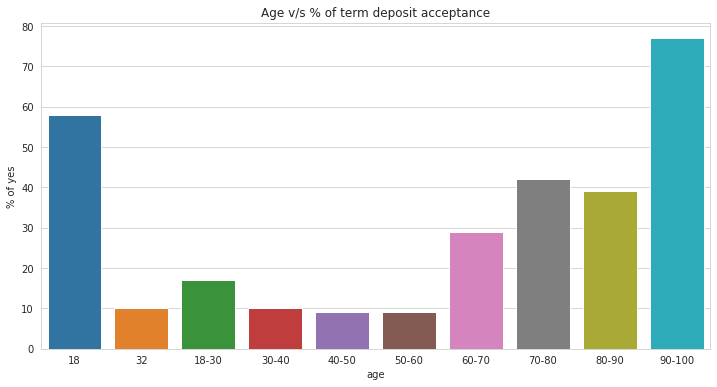

In [579]:
plt.figure(figsize=(12,6))
sns.barplot(x= ['18', '32', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'], y= [58, 10, 17,10,9,9,29,42,39,77])
plt.xlabel('age')
plt.ylabel('% of yes')
plt.title('Age v/s % of term deposit acceptance')

2. Job

In [580]:
#creating a dataset of job type
job = bank_df['job'].value_counts().reset_index()
job = job.rename(columns = {'index':'job_type', 'job':'job_count'}) # renaming the column
job['job_count%'] = job['job_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in job['job_type']:
  a = len(bank_df[(bank_df['job'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in job['job_type']:
  b = len(bank_df[(bank_df['job'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
job['yes%'] = (yes/job['job_count'])*100

# converting numbers into % of no
job['no%'] = (no/job['job_count'])*100

#Lets see dataset of job
job

,job_type,job_count,job_count%,yes%,no%
0,blue-collar,9732,21.525735,7.274969,92.725031
1,management,9458,20.919688,13.755551,86.244449
2,technician,7597,16.803433,11.056996,88.943004
3,admin.,5171,11.437482,12.202669,87.797331
4,services,4154,9.188029,8.883004,91.116996
5,retired,2264,5.007631,22.791519,77.208481
6,self-employed,1579,3.492513,11.842939,88.157061
7,entrepreneur,1487,3.289023,8.271688,91.728312
8,unemployed,1303,2.882042,15.502686,84.497314
9,housemaid,1240,2.742695,8.790323,91.209677


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


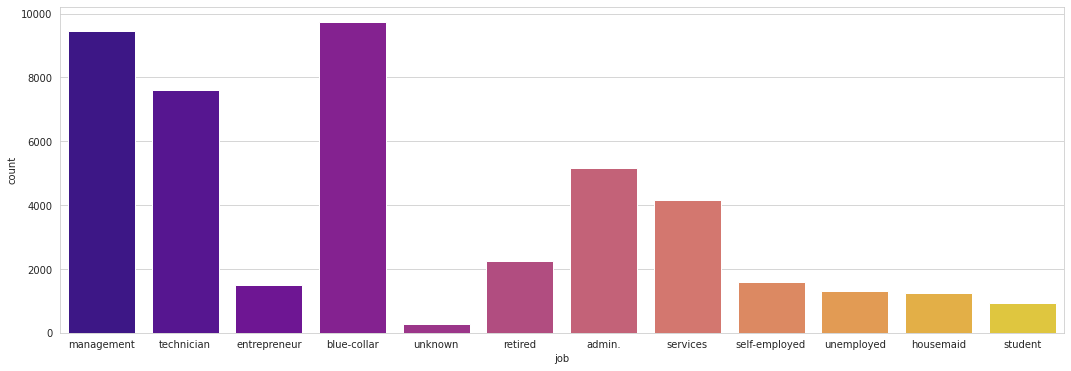

In [581]:
plt.figure(figsize=(18,6))
sns.countplot(bank_df['job'], palette="plasma")

Text(0.5, 1.0, '% of yes and no for each job type')

<Figure size 720x432 with 0 Axes>

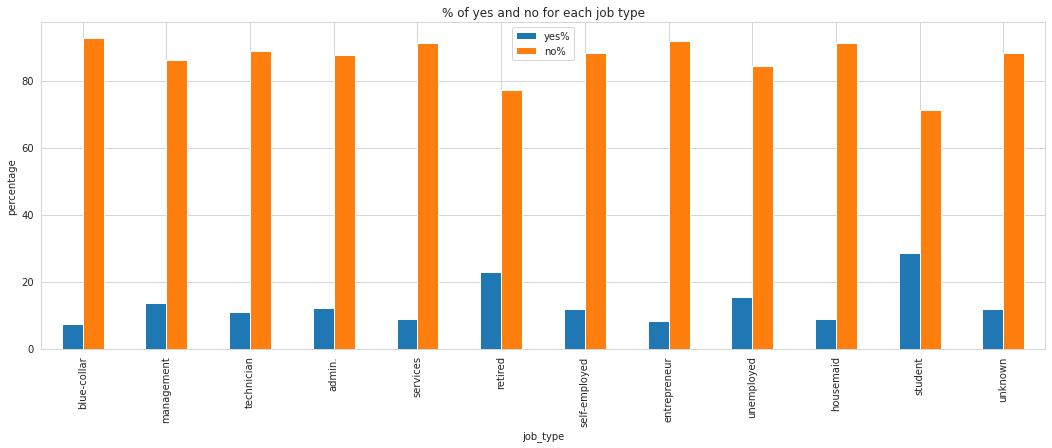

In [582]:
#set job type as an index
job.set_index('job_type', inplace=True)

#ploting bar graph of yes% and no% for each job type
plt.figure(figsize=(10,6))
job.drop(['job_count', 'job_count%'], axis=1, inplace=False).plot(kind='bar')
plt.xlabel('job_type')
plt.ylabel('percentage')
plt.title('% of yes and no for each job type')

Mean of yes%: 13.4
Mean of no%: 86.6


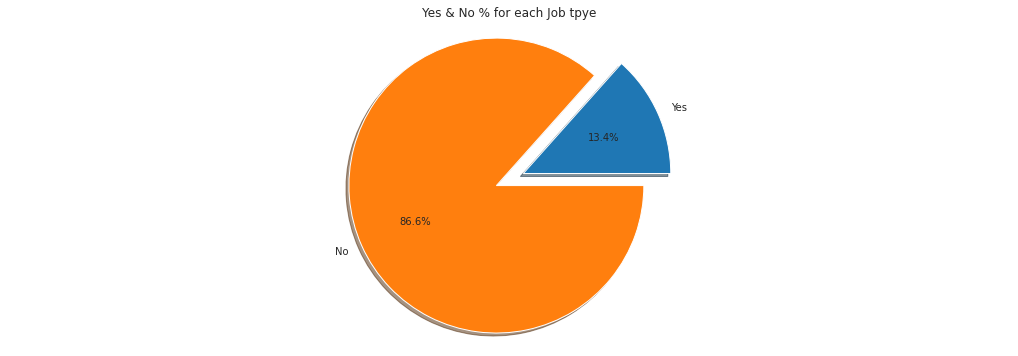

In [583]:
yes_mean = job['yes%'].mean()
no_mean = job['no%'].mean()
print(f'Mean of yes%: {round(yes_mean,2)}')
print(f'Mean of no%: {round(no_mean,2)}')

labels = 'Yes', 'No'
mean = [yes_mean, no_mean]

fig1, ax1 = plt.subplots()
ax1.pie(mean, explode=[0.1, 0.1], labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Yes & No % for each Job tpye')
plt.show()

3. Marital Statur

In [584]:
#creating a dataset of job type
marital = bank_df['marital'].value_counts().reset_index()
marital = marital.rename(columns = {'index':'marital', 'marital':'marital_count'}) # renaming the column
marital['marital_count%'] = marital['marital_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in marital['marital']:
  a = len(bank_df[(bank_df['marital'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in marital['marital']:
  b = len(bank_df[(bank_df['marital'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
marital['yes%'] = (yes/marital['marital_count'])*100

# converting numbers into % of no
marital['no%'] = (no/marital['marital_count'])*100

# #Lets see dataset of job
marital

,marital,marital_count,marital_count%,yes%,no%
0,married,27214,60.193316,10.123466,89.876534
1,single,12790,28.289576,14.949179,85.050821
2,divorced,5207,11.517109,11.945458,88.054542


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


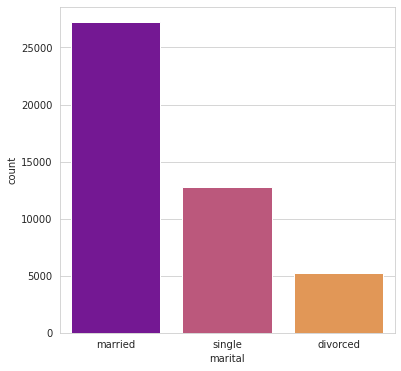

In [585]:
plt.figure(figsize=(6,6))
sns.countplot(bank_df['marital'], palette="plasma")

Text(0.5, 1.0, '% of yes and no for each marital status')

<Figure size 720x432 with 0 Axes>

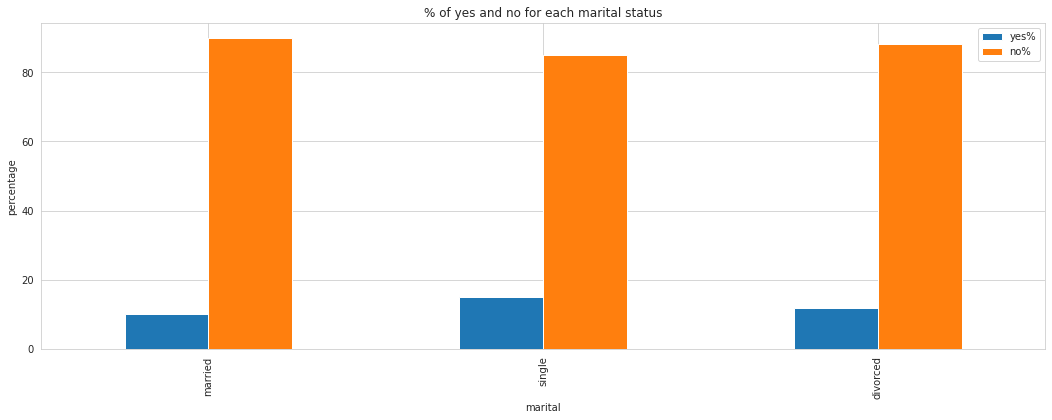

In [586]:
#set job type as an index
marital.set_index('marital', inplace=True)

#ploting bar graph of yes% and no% for each job type
plt.figure(figsize=(10,6))
marital.drop(['marital_count', 'marital_count%'], axis=1, inplace=False).plot(kind='bar')
plt.xlabel('marital')
plt.ylabel('percentage')
plt.title('% of yes and no for each marital status')

Mean of yes%: 12.34
Mean of no%: 87.66


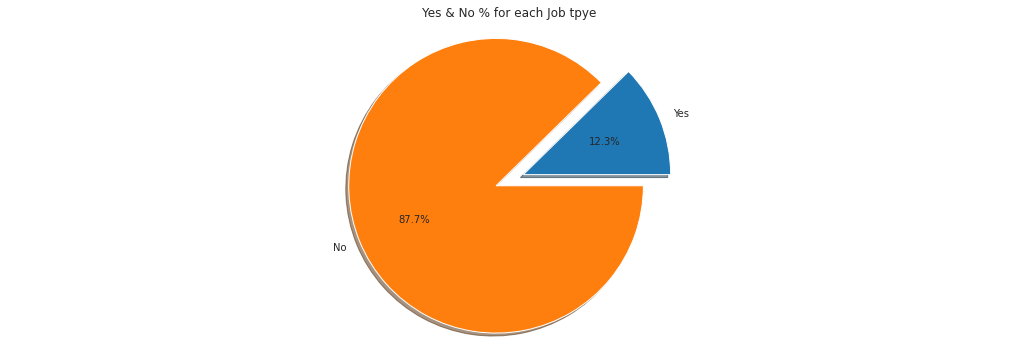

In [587]:
yes_mean = marital['yes%'].mean()
no_mean = marital['no%'].mean()
print(f'Mean of yes%: {round(yes_mean,2)}')
print(f'Mean of no%: {round(no_mean,2)}')

labels = 'Yes', 'No'
mean = [yes_mean, no_mean]

fig1, ax1 = plt.subplots()
ax1.pie(mean, explode=[0.1, 0.1], labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Yes & No % for each Job tpye')
plt.show()

4. Education

In [588]:
#creating a dataset of job type
education = bank_df['education'].value_counts().reset_index()
education = education.rename(columns = {'index':'education', 'education':'education_count'}) # renaming the column
education['education_count%'] = education['education_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in education['education']:
  a = len(bank_df[(bank_df['education'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in education['education']:
  b = len(bank_df[(bank_df['education'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
education['yes%'] = (yes/education['education_count'])*100

# converting numbers into % of no
education['no%'] = (no/education['education_count'])*100

# #Lets see dataset of job
education

,education,education_count,education_count%,yes%,no%
0,secondary,23202,51.319369,10.559435,89.440565
1,tertiary,13301,29.419831,15.006390,84.993610
2,primary,6851,15.153392,8.626478,91.373522
3,unknown,1857,4.107407,13.570275,86.429725


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


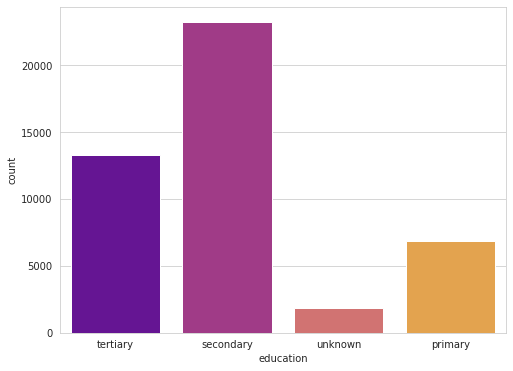

In [589]:
plt.figure(figsize=(8,6))
sns.countplot(bank_df['education'], palette="plasma")

Text(0.5, 1.0, '% of yes and no for each education status')

<Figure size 720x432 with 0 Axes>

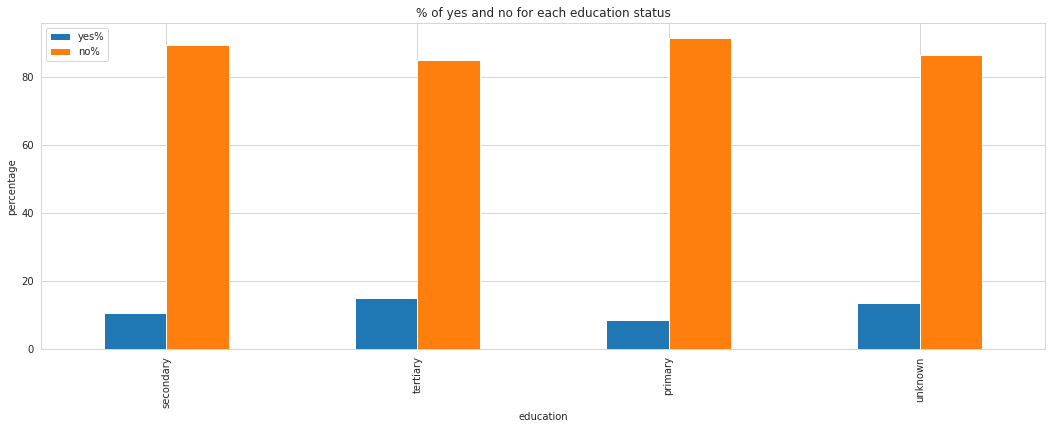

In [590]:
#set job type as an index
education.set_index('education', inplace=True)

#ploting bar graph of yes% and no% for each job type
plt.figure(figsize=(10,6))
education.drop(['education_count', 'education_count%'], axis=1, inplace=False).plot(kind='bar')
plt.xlabel('education')
plt.ylabel('percentage')
plt.title('% of yes and no for each education status')

Mean of yes%: 11.94
Mean of no%: 88.06


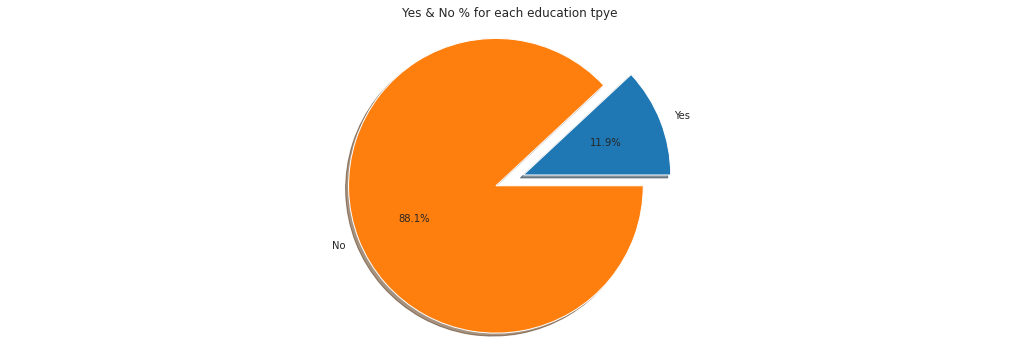

In [591]:
yes_mean = education['yes%'].mean()
no_mean = education['no%'].mean()
print(f'Mean of yes%: {round(yes_mean,2)}')
print(f'Mean of no%: {round(no_mean,2)}')

labels = 'Yes', 'No'
mean = [yes_mean, no_mean]

fig1, ax1 = plt.subplots()
ax1.pie(mean, explode=[0.1, 0.1], labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Yes & No % for each education tpye')
plt.show()

5. Default

In [592]:
#creating a dataset of job type
default = bank_df['default'].value_counts().reset_index()
default = default.rename(columns = {'index':'default', 'default':'default_count'}) # renaming the column
default['default_count%'] = default['default_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in default['default']:
  a = len(bank_df[(bank_df['default'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in default['default']:
  b = len(bank_df[(bank_df['default'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
default['yes%'] = (yes/default['default_count'])*100

# converting numbers into % of no
default['no%'] = (no/default['default_count'])*100

# #Lets see dataset of job
default

,default,default_count,default_count%,yes%,no%
0,no,44396,98.197341,11.796108,88.203892
1,yes,815,1.802659,6.380368,93.619632


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


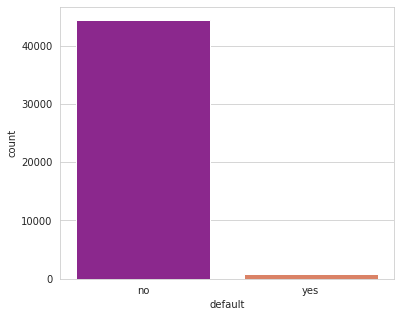

In [593]:
plt.figure(figsize=(6,5))
sns.countplot(bank_df['default'], palette="plasma")

Text(0.5, 1.0, '% of yes and no for each default status')

<Figure size 720x432 with 0 Axes>

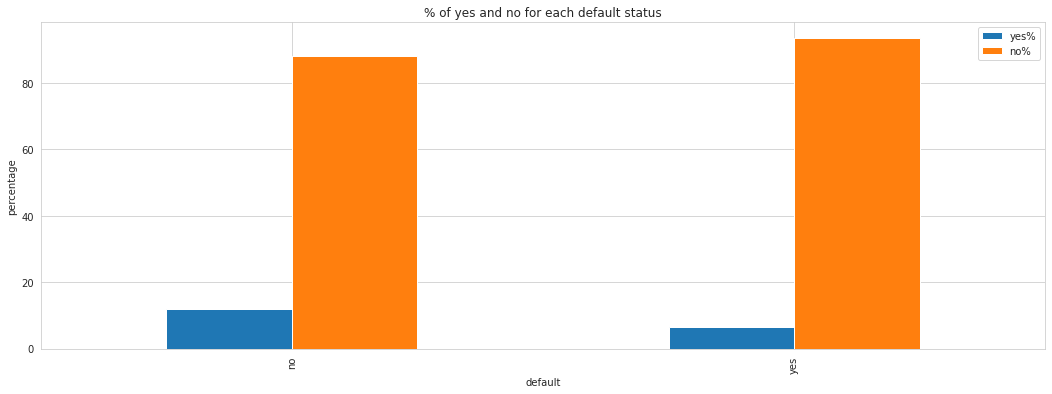

In [594]:
#set job type as an index
default.set_index('default', inplace=True)

#ploting bar graph of yes% and no% for each job type
plt.figure(figsize=(10,6))
default.drop(['default_count', 'default_count%'], axis=1, inplace=False).plot(kind='bar')
plt.xlabel('default')
plt.ylabel('percentage')
plt.title('% of yes and no for each default status')

Mean of yes%: 9.09
Mean of no%: 90.91


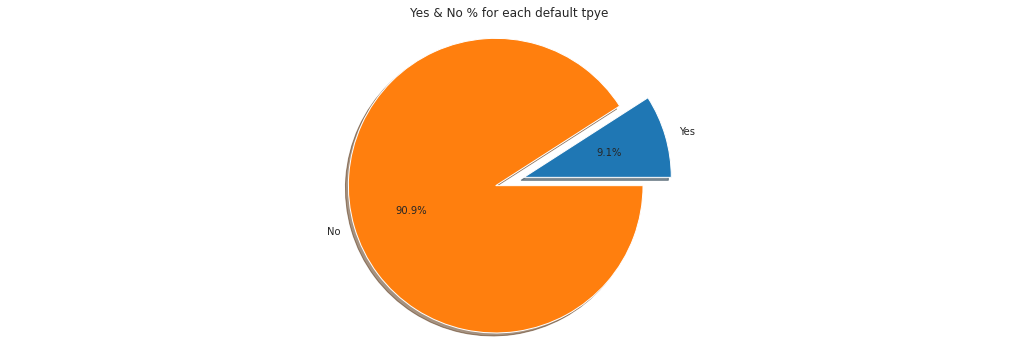

In [595]:
yes_mean = default['yes%'].mean()
no_mean = default['no%'].mean()
print(f'Mean of yes%: {round(yes_mean,2)}')
print(f'Mean of no%: {round(no_mean,2)}')

labels = 'Yes', 'No'
mean = [yes_mean, no_mean]

fig1, ax1 = plt.subplots()
ax1.pie(mean, explode=[0.1, 0.1], labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Yes & No % for each default tpye')
plt.show()

6. Housing Loan

In [596]:
#creating a dataset of job type
housing = bank_df['housing'].value_counts().reset_index()
housing = housing.rename(columns = {'index':'housing', 'housing':'housing_count'}) # renaming the column
housing['housing_count%'] = housing['housing_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in housing['housing']:
  a = len(bank_df[(bank_df['housing'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in housing['housing']:
  b = len(bank_df[(bank_df['housing'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
housing['yes%'] = (yes/housing['housing_count'])*100

# converting numbers into % of no
housing['no%'] = (no/housing['housing_count'])*100

# #Lets see dataset of job
housing

,housing,housing_count,housing_count%,yes%,no%
0,yes,25130,55.583818,7.699960,92.300040
1,no,20081,44.416182,16.702355,83.297645


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


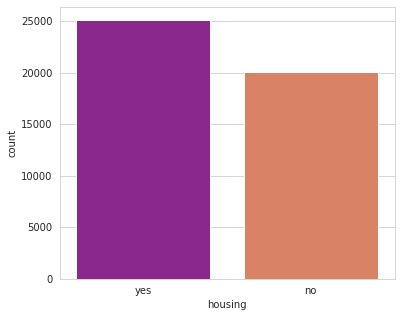

In [597]:
plt.figure(figsize=(6,5))
sns.countplot(bank_df['housing'], palette="plasma")

Text(0.5, 1.0, '% of yes and no which already take housing loan or not')

<Figure size 720x432 with 0 Axes>

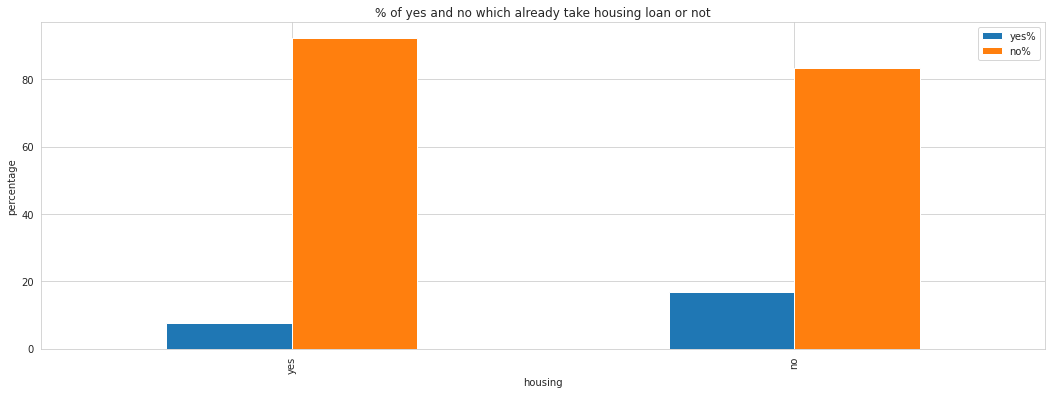

In [598]:
#set job type as an index
housing.set_index('housing', inplace=True)

#ploting bar graph of yes% and no% for each job type
plt.figure(figsize=(10,6))
housing.drop(['housing_count', 'housing_count%'], axis=1, inplace=False).plot(kind='bar')
plt.xlabel('housing')
plt.ylabel('percentage')
plt.title('% of yes and no which already take housing loan or not')

Mean of yes%: 12.2
Mean of no%: 87.8


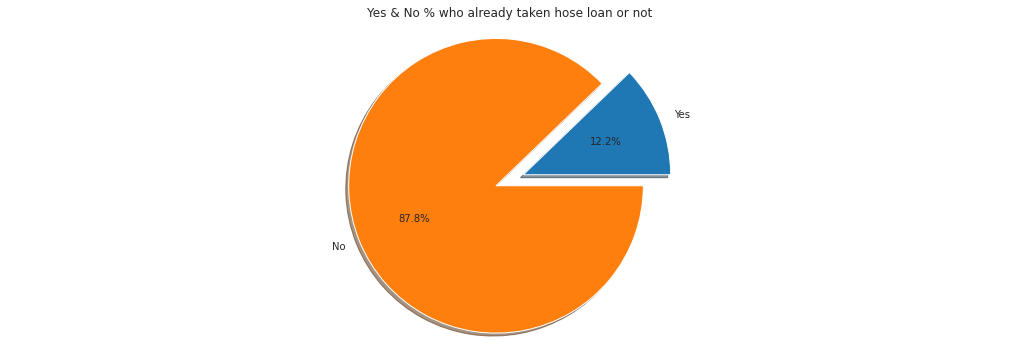

In [599]:
yes_mean = housing['yes%'].mean()
no_mean = housing['no%'].mean()
print(f'Mean of yes%: {round(yes_mean,2)}')
print(f'Mean of no%: {round(no_mean,2)}')

labels = 'Yes', 'No'
mean = [yes_mean, no_mean]

fig1, ax1 = plt.subplots()
ax1.pie(mean, explode=[0.1, 0.1], labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Yes & No % who already taken hose loan or not')
plt.show()

7. Personal Loan

In [600]:
#creating a dataset of job type
loan = bank_df['loan'].value_counts().reset_index()
loan = loan.rename(columns = {'index':'loan', 'loan':'loan_count'}) # renaming the column
loan['loan_count%'] = loan['loan_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in loan['loan']:
  a = len(bank_df[(bank_df['loan'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in loan['loan']:
  b = len(bank_df[(bank_df['loan'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
loan['yes%'] = (yes/loan['loan_count'])*100

# converting numbers into % of no
loan['no%'] = (no/loan['loan_count'])*100

# #Lets see dataset of job
loan

,loan,loan_count,loan_count%,yes%,no%
0,no,37967,83.977351,12.655727,87.344273
1,yes,7244,16.022649,6.681391,93.318609


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


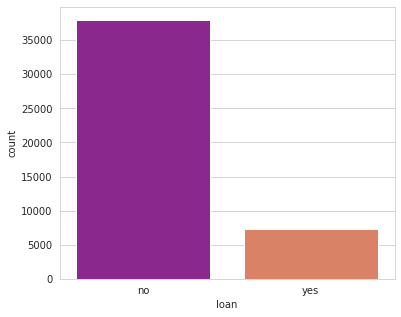

In [601]:
plt.figure(figsize=(6,5))
sns.countplot(bank_df['loan'], palette="plasma")

Text(0.5, 1.0, '% of yes and no which already take personal loan or not')

<Figure size 720x432 with 0 Axes>

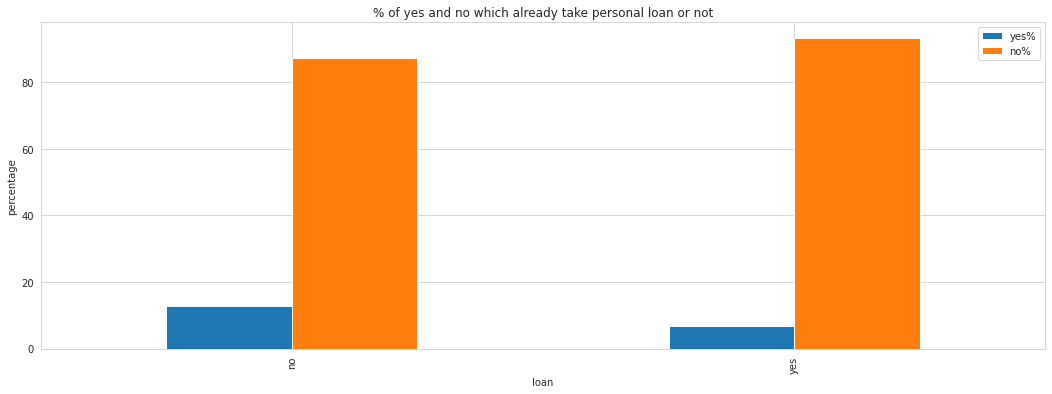

In [602]:
#set job type as an index
loan.set_index('loan', inplace=True)

#ploting bar graph of yes% and no% for each job type
plt.figure(figsize=(10,6))
loan.drop(['loan_count', 'loan_count%'], axis=1, inplace=False).plot(kind='bar')
plt.xlabel('loan')
plt.ylabel('percentage')
plt.title('% of yes and no which already take personal loan or not')

Mean of yes%: 9.67
Mean of no%: 90.33


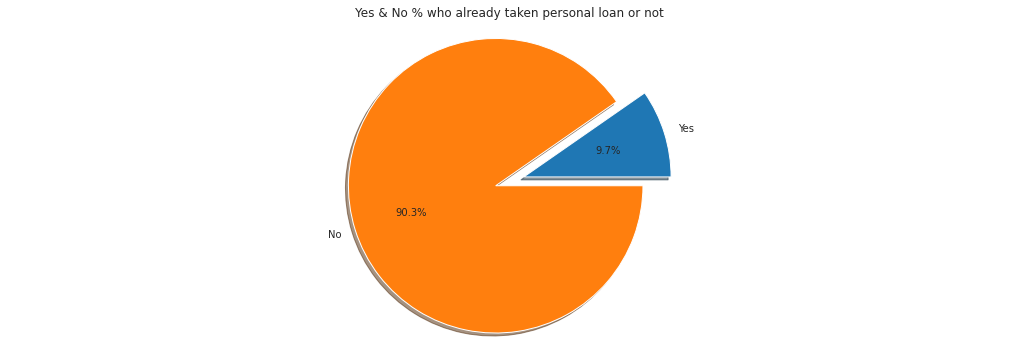

In [603]:
yes_mean = loan['yes%'].mean()
no_mean = loan['no%'].mean()
print(f'Mean of yes%: {round(yes_mean,2)}')
print(f'Mean of no%: {round(no_mean,2)}')

labels = 'Yes', 'No'
mean = [yes_mean, no_mean]

fig1, ax1 = plt.subplots()
ax1.pie(mean, explode=[0.1, 0.1], labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Yes & No % who already taken personal loan or not')
plt.show()

8. Contact

In [604]:
#creating a dataset of job type
contact = bank_df['contact'].value_counts().reset_index()
contact = contact.rename(columns = {'index':'contact', 'contact':'contact_count'}) # renaming the column
contact['contact_count%'] = contact['contact_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in contact['contact']:
  a = len(bank_df[(bank_df['contact'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in contact['contact']:
  b = len(bank_df[(bank_df['contact'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
contact['yes%'] = (yes/contact['contact_count'])*100

# converting numbers into % of no
contact['no%'] = (no/contact['contact_count'])*100

# #Lets see dataset of job
contact

,contact,contact_count,contact_count%,yes%,no%
0,cellular,29285,64.774059,14.918900,85.081100
1,unknown,13020,28.798301,4.070661,95.929339
2,telephone,2906,6.427639,13.420509,86.579491


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


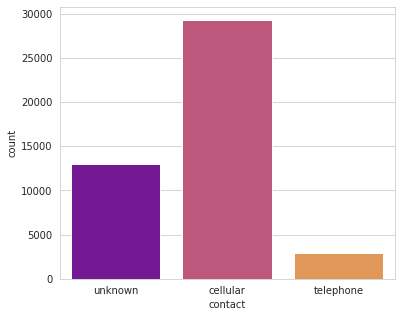

In [605]:
plt.figure(figsize=(6,5))
sns.countplot(bank_df['contact'], palette="plasma")

Text(0.5, 1.0, '% of yes or no of each contact type')

<Figure size 720x432 with 0 Axes>

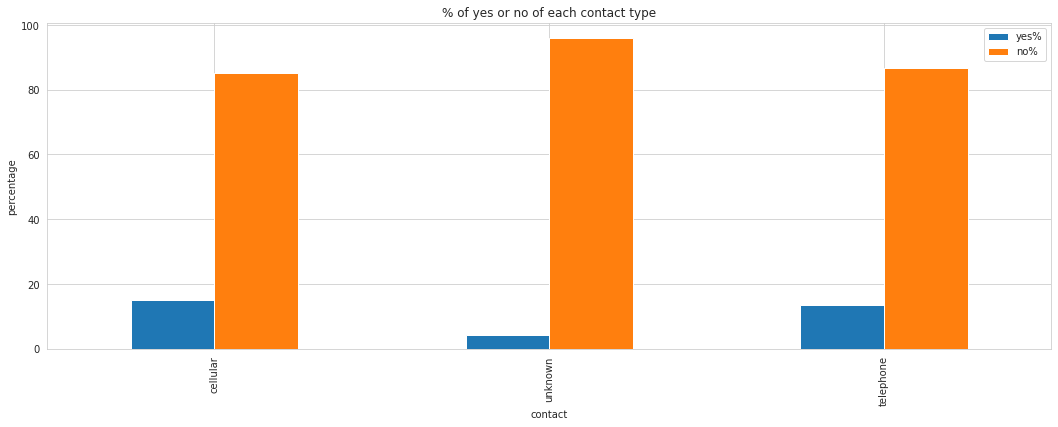

In [606]:
#set job type as an index
contact.set_index('contact', inplace=True)

#ploting bar graph of yes% and no% for each job type
plt.figure(figsize=(10,6))
contact.drop(['contact_count', 'contact_count%'], axis=1, inplace=False).plot(kind='bar')
plt.xlabel('contact')
plt.ylabel('percentage')
plt.title('% of yes or no of each contact type')

Mean of yes%: 10.8
Mean of no%: 89.2


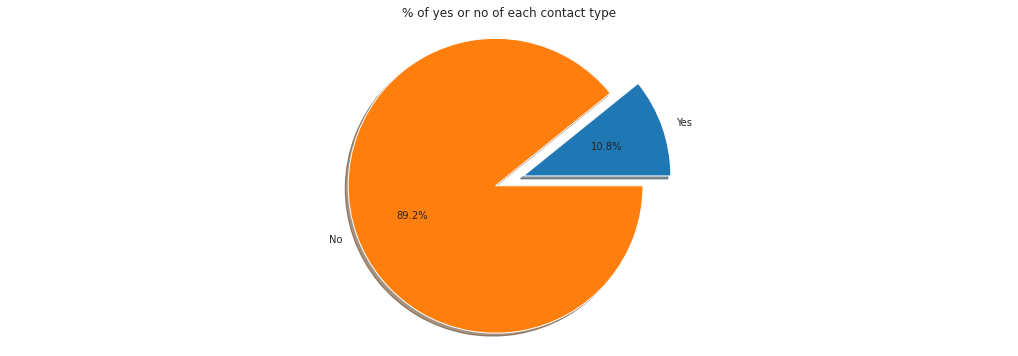

In [607]:
yes_mean = contact['yes%'].mean()
no_mean = contact['no%'].mean()
print(f'Mean of yes%: {round(yes_mean,2)}')
print(f'Mean of no%: {round(no_mean,2)}')

labels = 'Yes', 'No'
mean = [yes_mean, no_mean]

fig1, ax1 = plt.subplots()
ax1.pie(mean, explode=[0.1, 0.1], labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of yes or no of each contact type')
plt.show()

9.Day

In [608]:
#creating a dataset of job type
day = bank_df['day'].value_counts().reset_index()
day = day.rename(columns = {'index':'day', 'day':'day_count'}) # renaming the column
day['day_count%'] = day['day_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in day['day']:
  a = len(bank_df[(bank_df['day'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in day['day']:
  b = len(bank_df[(bank_df['day'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
day['yes%'] = (yes/day['day_count'])*100

# converting numbers into % of no
day['no%'] = (no/day['day_count'])*100

#Lets see dataset of job
day.head()

,day,day_count,day_count%,yes%,no%
0,20,2752,6.087014,6.976744,93.023256
1,18,2308,5.104952,9.878683,90.121317
2,21,2026,4.481210,9.921027,90.078973
3,17,1939,4.288779,9.076844,90.923156
4,6,1932,4.273296,9.368530,90.631470


In [609]:
day.tail()

,day,day_count,day_count%,yes%,no%
26,25,840,1.857955,15.833333,84.166667
27,31,643,1.422220,7.153966,92.846034
28,10,524,1.159010,23.091603,76.908397
29,24,447,0.988697,13.870246,86.129754
30,1,322,0.712216,27.950311,72.049689


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


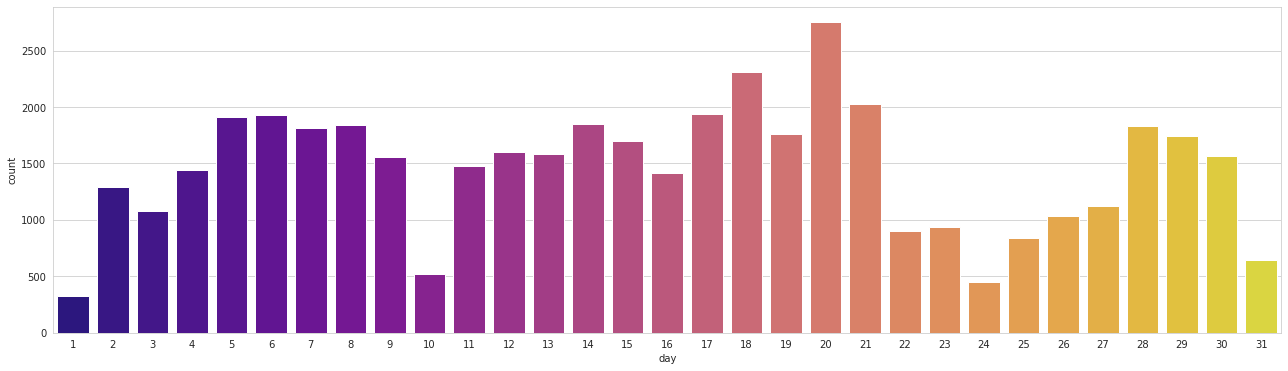

In [610]:
plt.figure(figsize=(22,6))
sns.countplot(bank_df['day'], palette="plasma")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


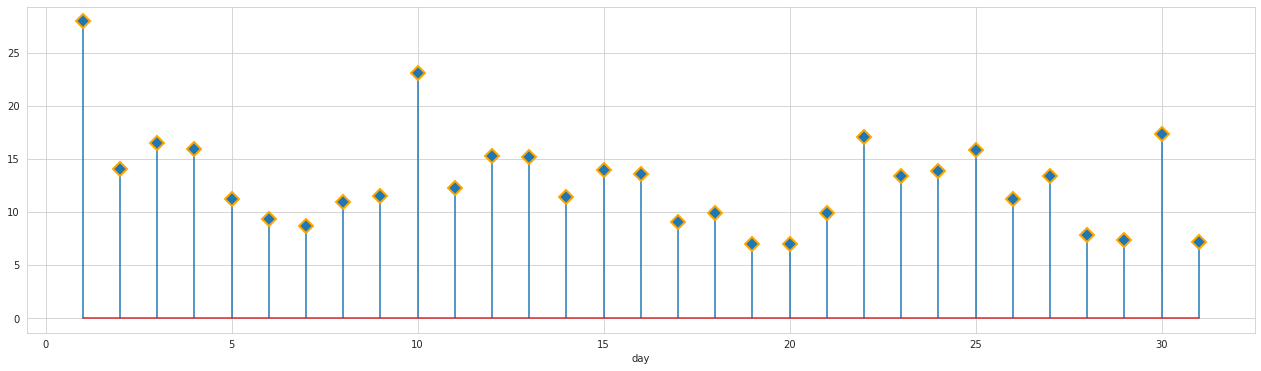

In [611]:
# create data
x= day['day']
value = day['yes%']
 
# change color and shape and size and edges
plt.figure(figsize=(22,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.xlabel('day')
plt.show()

10. Month

In [612]:
#creating a dataset of job type
month = bank_df['month'].value_counts().reset_index()
month = month.rename(columns = {'index':'month', 'month':'month_count'}) # renaming the column
month['month_count%'] = month['month_count']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in month['month']:
  a = len(bank_df[(bank_df['month'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in month['month']:
  b = len(bank_df[(bank_df['month'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
month['yes%'] = (yes/month['month_count'])*100

# converting numbers into % of no
month['no%'] = (no/month['month_count'])*100

# #Lets see dataset of job
month

,month,month_count,month_count%,yes%,no%
0,may,13766,30.448342,6.719454,93.280546
1,jul,6895,15.250713,9.093546,90.906454
2,aug,6247,13.817434,11.013286,88.986714
3,jun,5341,11.813497,10.222805,89.777195
4,nov,3970,8.781049,10.151134,89.848866
5,apr,2932,6.485147,19.679400,80.320600
6,feb,2649,5.859194,16.647792,83.352208
7,jan,1403,3.103227,10.121169,89.878831
8,oct,738,1.632346,43.766938,56.233062
9,sep,579,1.280662,46.459413,53.540587


Text(0.5, 1.0, 'frequency_of_Month')

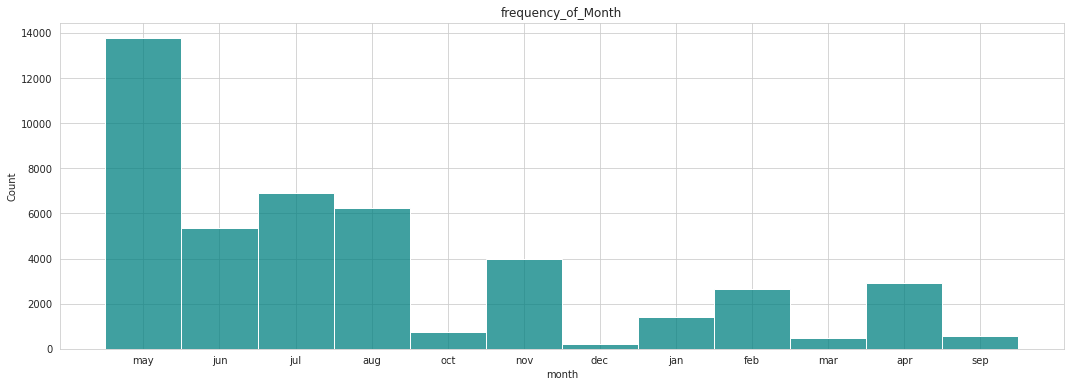

In [613]:
rcParams['figure.figsize'] = 18,6
sns.set_style('whitegrid')
visual6 = sns.histplot(data=bank_df, x=bank_df['month'], color='teal')
visual6.set_title('frequency_of_Month')

Text(0.5, 1.0, '% of yes or no of each contact type')

<Figure size 720x432 with 0 Axes>

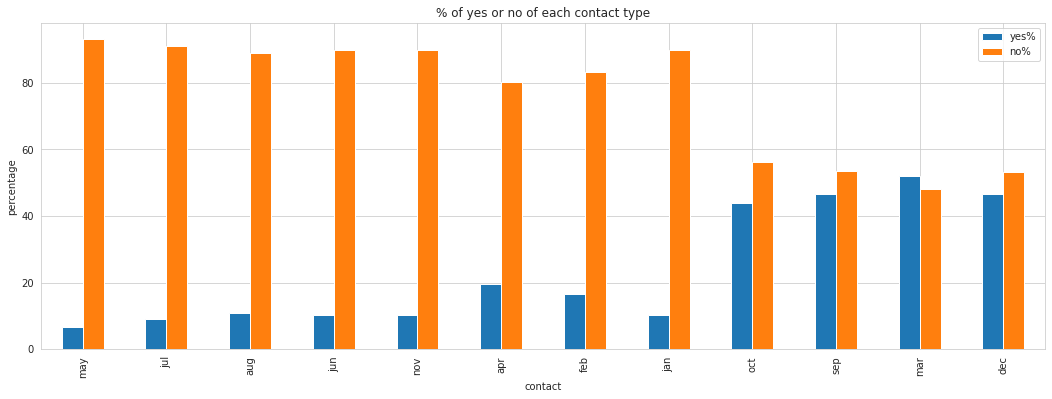

In [614]:
#set job type as an index
month.set_index('month', inplace=True)

#ploting bar graph of yes% and no% for each job type
plt.figure(figsize=(10,6))
month.drop(['month_count', 'month_count%'], axis=1, inplace=False).plot(kind='bar')
plt.xlabel('contact')
plt.ylabel('percentage')
plt.title('% of yes or no of each contact type')

Mean of yes%: 23.55
Mean of no%: 76.45


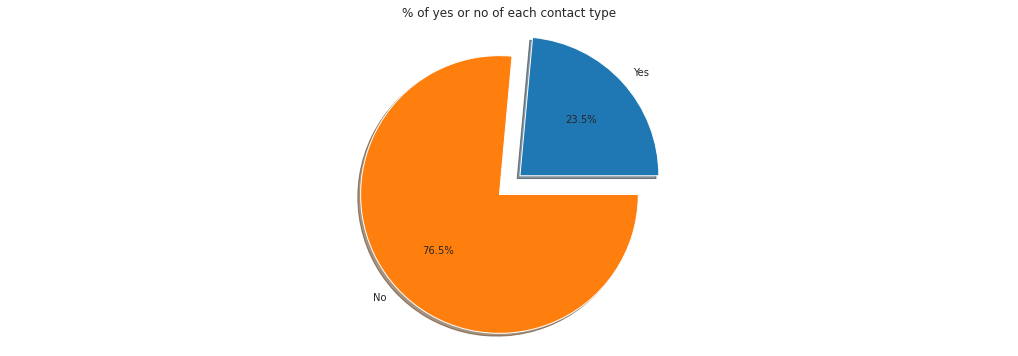

In [615]:
yes_mean = month['yes%'].mean()
no_mean = month['no%'].mean()
print(f'Mean of yes%: {round(yes_mean,2)}')
print(f'Mean of no%: {round(no_mean,2)}')

labels = 'Yes', 'No'
mean = [yes_mean, no_mean]

fig1, ax1 = plt.subplots()
ax1.pie(mean, explode=[0.1, 0.1], labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of yes or no of each contact type')
plt.show()

11. Campaign

In [616]:
campaign = bank_df['campaign'].value_counts().reset_index()
campaign = campaign.rename(columns = {'index':'no_of_contact', 'campaign':'no_of_person'}) # renaming the column
campaign['no_of_person%'] = campaign['no_of_person']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in campaign['no_of_contact']:
  a = len(bank_df[(bank_df['campaign'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in campaign['no_of_contact']:
  b = len(bank_df[(bank_df['campaign'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
campaign['yes%'] = (yes/campaign['no_of_person'])*100

# converting numbers into % of no
campaign['no%'] = (no/campaign['no_of_person'])*100

# #Lets see dataset of job
campaign.head()

,no_of_contact,no_of_person,no_of_person%,yes%,no%
0,1,17544,38.804716,14.597583,85.402417
1,2,12505,27.659198,11.203519,88.796481
2,3,5521,12.211630,11.193624,88.806376
3,4,3522,7.790140,9.000568,90.999432
4,5,1764,3.901705,7.879819,92.120181


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


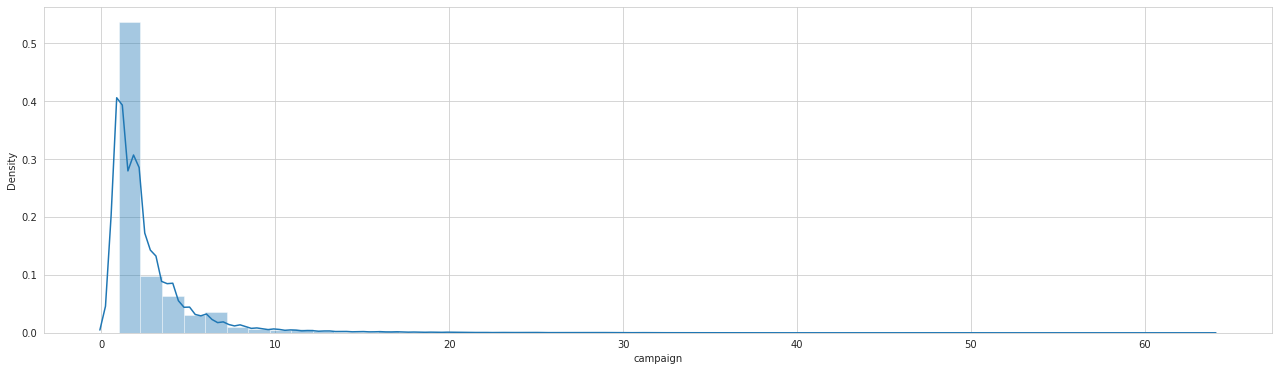

In [617]:
plt.figure(figsize=(22,6))
sns.distplot(bank_df['campaign'])

In [618]:
campaign_mean = bank_df['campaign'].mean()
campaign_median = bank_df['campaign'].median()
campaign_mode = bank_df['campaign'].mode()
campaign_max = campaign['no_of_contact'].max()
campaign_min = campaign['no_of_contact'].min()

print(f'Mean of the no of contact is: {campaign_mean}')
print(f'Median of the no of contact is: {campaign_median}')
print(f'Maximum no of contact is: {campaign_max}')
print(f'Minimum no of contact is: {campaign_min}')
print(f'Mode of no of contact is: {campaign_mode}')

Mean of the no of contact is: 2.763840658246887
Median of the no of contact is: 2.0
Maximum no of contact is: 63
Minimum no of contact is: 1
Mode of no of contact is: 0    1
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


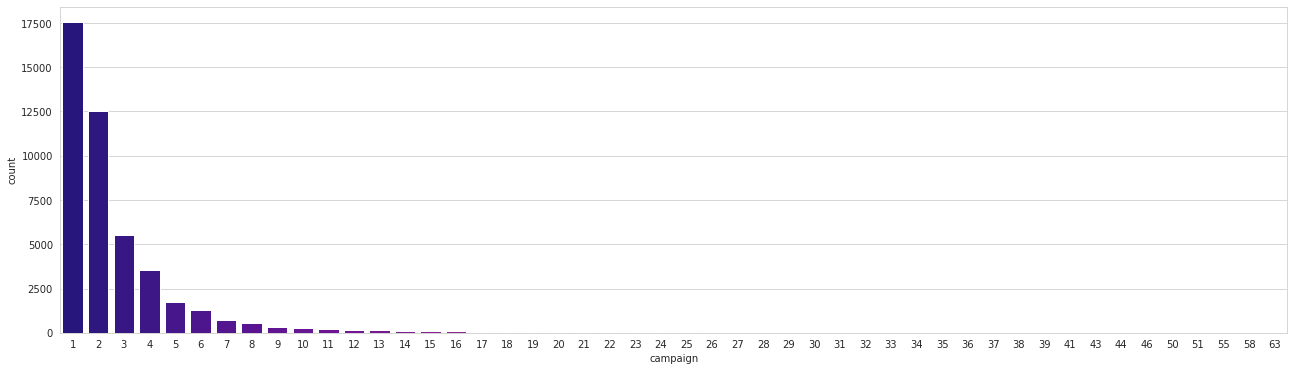

In [619]:
plt.figure(figsize=(22,6))
sns.countplot(bank_df['campaign'], palette="plasma")

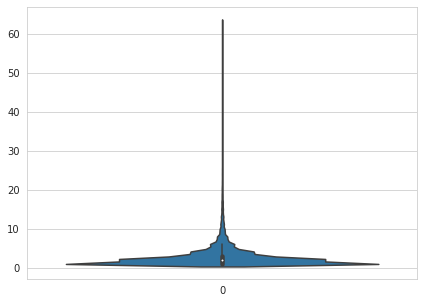

In [620]:
plt.figure(figsize=(7,5))
sns.violinplot(data=bank_df['campaign'])

In [621]:
campaign_q1 = bank_df['campaign'].quantile(0.25)
campaign_q3 = bank_df['campaign'].quantile(0.75)
campaign_iqr = campaign_q3 - campaign_q1
campaign_ll  = campaign_q1 - 1.5*campaign_iqr
campaign_ul  = campaign_q3 + 1.5*campaign_iqr
# print(campaign_q1)
# print(campaign_q3)
# print(campaign_iqr)
print(f'Lower limit of campaign :{campaign_ll}')
print(f'Upper limit of campaign :{campaign_ul}')

Lower limit of campaign :-2.0
Upper limit of campaign :6.0


In [622]:
campaign_32 = campaign[campaign['no_of_contact']<=32]
campaign_32.head(2)

#99.99% data under 32

,no_of_contact,no_of_person,no_of_person%,yes%,no%
0,1,17544,38.804716,14.597583,85.402417
1,2,12505,27.659198,11.203519,88.796481


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


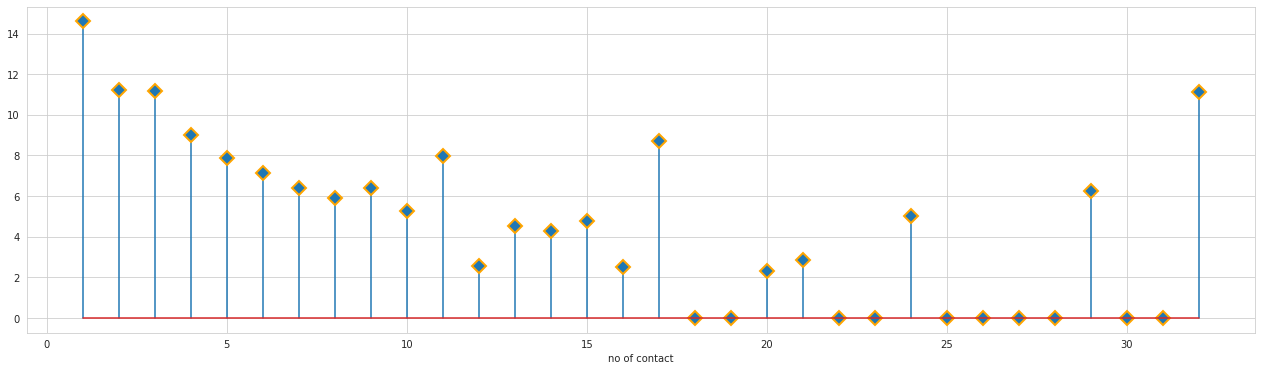

In [623]:
# create data
x= campaign_32['no_of_contact']
value = campaign_32['yes%']
 
# change color and shape and size and edges
plt.figure(figsize=(22,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.xlabel('no of contact')
plt.show()

12. Previous

In [634]:
#removing rows that contain 0 in previous column
bank_not_0= bank_df[bank_df['previous'] !=0]

previous = bank_not_0['previous'].value_counts().reset_index()
previous = previous.rename(columns = {'index':'no_of_contact', 'previous':'no_of_person'}) # renaming the column
previous['no_of_person%'] = previous['no_of_person']*100/len(bank_df)  # creating new column of job count for each job type

#finding out the number of each job type category who accept term deposit
yes = []
for y in previous['no_of_contact']:
  a = len(bank_not_0[(bank_not_0['previous'] == y) & (bank_not_0['y'] == 'yes')])
  yes.append(a)

#finding out the number of each job type category who did not accept term deposit
no = []
for n in previous['no_of_contact']:
  b = len(bank_not_0[(bank_not_0['previous'] == n) & (bank_not_0['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
previous['yes%'] = (yes/previous['no_of_person'])*100

# converting numbers into % of no
previous['no%'] = (no/previous['no_of_person'])*100

# #Lets see dataset of job
previous.head()

,no_of_contact,no_of_person,no_of_person%,yes%,no%
0,1,2772,6.131251,21.031746,78.968254
1,2,2106,4.658158,21.652422,78.347578
2,3,1142,2.525934,25.744308,74.255692
3,4,714,1.579262,23.949580,76.050420
4,5,459,1.015240,26.361656,73.638344


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


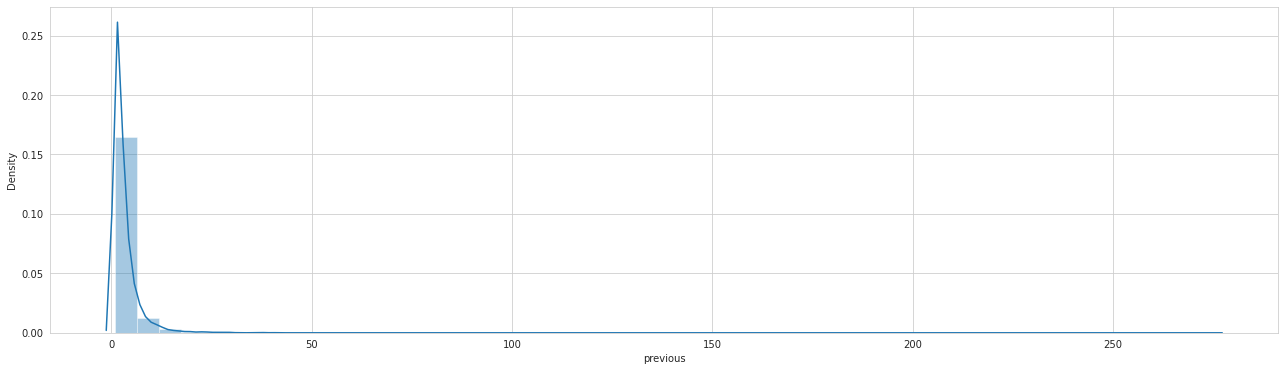

In [648]:
plt.figure(figsize=(22,6))
sns.distplot(bank_not_0['previous'])

In [649]:
previous_mean = bank_not_0['previous'].mean()
previous_median = bank_not_0['previous'].median()
previous_mode = bank_not_0['previous'].mode()
previous_max = previous['no_of_contact'].max()
previous_min = previous['no_of_contact'].min()

print(f'Mean of the no of contact before the campaign is: {previous_mean}')
print(f'Median of the no of contact  before the campaign is: {previous_median}')
print(f'Maximum no of contact  before the campaign is: {previous_max}')
print(f'Minimum no of contact  before the campaign is: {previous_min}')
print(f'Mode of no of contact  before the campaign is: {previous_mode}')

Mean of the no of contact before the campaign is: 3.1775463243308706
Median of the no of contact  before the campaign is: 2.0
Maximum no of contact  before the campaign is: 275
Minimum no of contact  before the campaign is: 1
Mode of no of contact  before the campaign is: 0    1
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


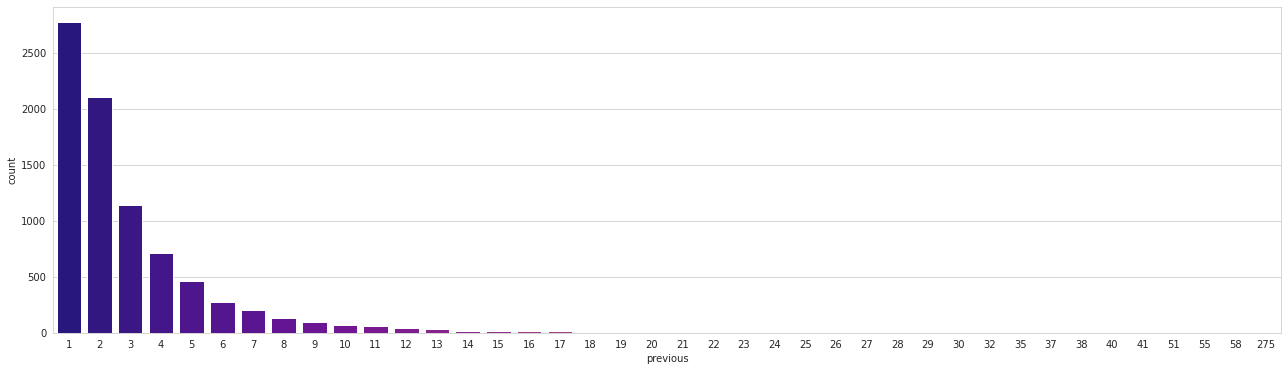

In [650]:
plt.figure(figsize=(22,6))
sns.countplot(bank_not_0['previous'], palette="plasma")

In [654]:
prev_q1 = bank_not_0['previous'].quantile(0.25)
prev_q3 = bank_not_0['previous'].quantile(0.75)
prev_iqr = prev_q3 - prev_q1
prev_ll  = prev_q1 - 1.5*prev_iqr
prev_ul  = prev_q3 + 1.5*prev_iqr
# print(prev_q1)
# print(prev_q3)
# print(prev_iqr)
print(f'Lower limit of age :{prev_ll}')
print(f'Upper limit of age :{prev_ul}')

Lower limit of age :-3.5
Upper limit of age :8.5


In [671]:
previous_9 = previous[previous['no_of_contact']<=9]
previous_9

,no_of_contact,no_of_person,no_of_person%,yes%,no%
0,1,2772,6.131251,21.031746,78.968254
1,2,2106,4.658158,21.652422,78.347578
2,3,1142,2.525934,25.744308,74.255692
3,4,714,1.579262,23.949580,76.050420
4,5,459,1.015240,26.361656,73.638344
5,6,277,0.612683,29.963899,70.036101
6,7,205,0.453429,26.341463,73.658537
7,8,129,0.285329,30.232558,69.767442
8,9,92,0.203490,26.086957,73.913043


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


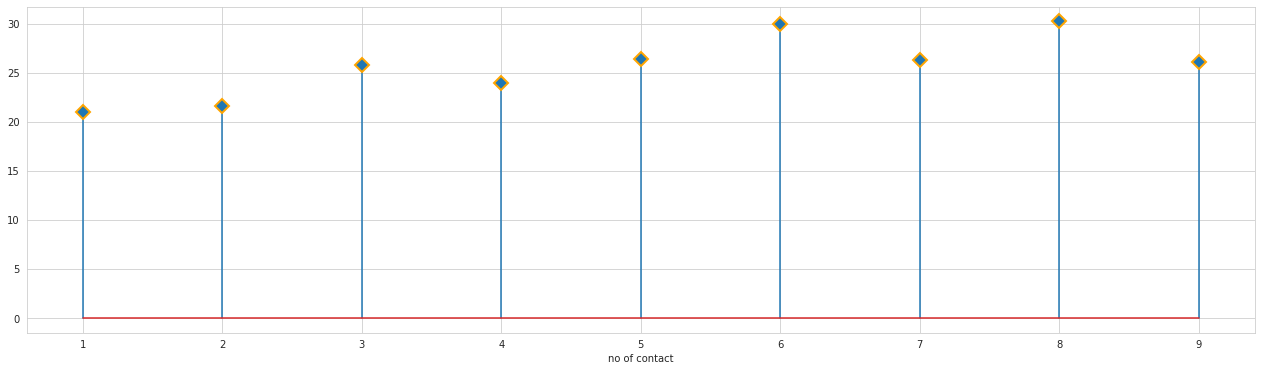

In [672]:
# create data
x= previous_9['no_of_contact']
value = previous_9['yes%']
 
# change color and shape and size and edges
plt.figure(figsize=(22,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.xlabel('no of contact')
plt.show()

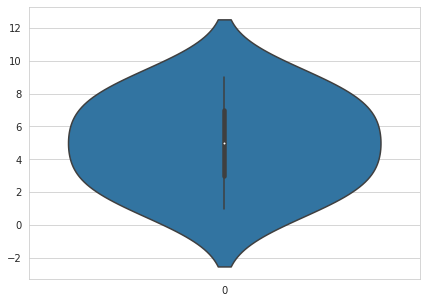

In [673]:
plt.figure(figsize=(7,5))
sns.violinplot(data=previous_9['no_of_contact'])

13. Balance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


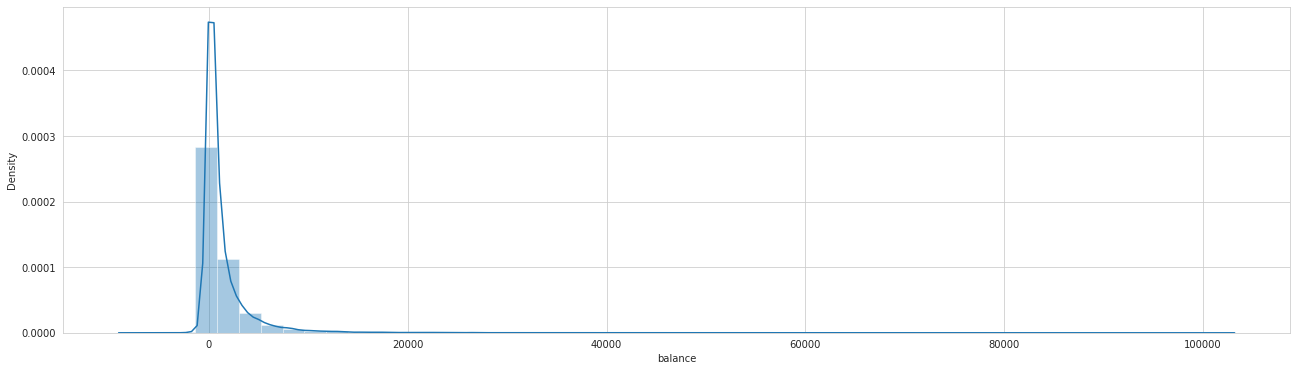

In [674]:
plt.figure(figsize=(22,6))
sns.distplot(bank_df['balance'])

Text(0.5, 1.0, 'frequency_of_price<1000')

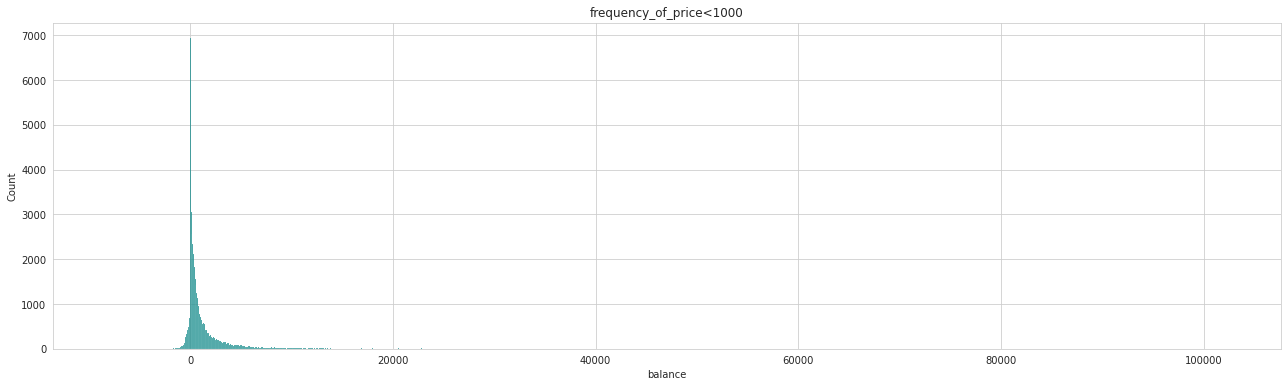

In [676]:
rcParams['figure.figsize'] = 22,6
sns.set_style('whitegrid')
visual6 = sns.histplot(data=bank_df, x=bank_df['balance'], color='teal')
visual6.set_title('frequency_of_price<1000')

In [ ]:
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
rcParams['figure.figsize'] = 22,6
sns.set_style('whitegrid')
visual6 = sns.histplot(data=price_1000, x=price_1000['price'], color='teal')
visual6.set_title('frequency_of_price<1000')